In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import spearmanr
from scipy import stats

In [2]:
# Read data using Pandas from the UCI data repository.
feature_names = ["X1", "X2", "X3", "X4","X5", "X6","X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14","X15", "X16","X17", "X18", "X19", "X20", "X21", "X22", "X23", "Y"]
X = pd.read_csv("p2_mod.csv", header=0, names=feature_names)
y = X["Y"]                      # Select target label
X.drop(['Y'], axis=1, inplace=True)   # Remove target label from dataset
display(X.head())   

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [3]:
print(X)
print(y)

           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...     X14    X15    X16  \
0       20000   2   2   1  24   2   2  -1  -1   -2  ...     689      0      0   
1      120000   2   2   2  26  -1   2   0   0    0  ...    2682   3272   3455   
2       90000   2   2   2  34   0   0   0   0    0  ...   13559  14331  14948   
3       50000   2   2   1  37   0   0   0   0    0  ...   49291  28314  28959   
4       50000   1   2   1  57  -1   0  -1   0    0  ...   35835  20940  19146   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...     ...    ...    ...   
29995  220000   1   3   1  39   0   0   0   0    0  ...  208365  88004  31237   
29996  150000   1   3   2  43  -1  -1  -1  -1    0  ...    3502   8979   5190   
29997   30000   1   2   2  37   4   3   2  -1    0  ...    2758  20878  20582   
29998   80000   1   3   1  41   1  -1   0   0    0  ...   76304  52774  11855   
29999   50000   1   2   1  46   0   0   0   0    0  ...   49764  36535  32428   

         X17    X18    X19 

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
clf= DecisionTreeClassifier()

In [6]:
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.7623837072433597, 0.9891304347826086, 'X6 <= 1.5\ngini = 0.345\nsamples = 30000\nvalue = [23364, 6636]'),
 Text(0.6090590942641989, 0.967391304347826, 'X7 <= 1.5\ngini = 0.277\nsamples = 26870\nvalue = [22411, 4459]'),
 Text(0.3846260916716425, 0.9456521739130435, 'X20 <= 678.5\ngini = 0.245\nsamples = 24599\nvalue = [21085, 3514]'),
 Text(0.1636964434047445, 0.9239130434782609, 'X12 <= 530.0\ngini = 0.339\nsamples = 6776\nvalue = [5312, 1464]'),
 Text(0.08557488128274177, 0.9021739130434783, 'X21 <= 3.5\ngini = 0.4\nsamples = 2664\nvalue = [1929, 735]'),
 Text(0.06184109126101438, 0.8804347826086957, 'X5 <= 55.5\ngini = 0.427\nsamples = 1645\nvalue = [1136, 509]'),
 Text(0.03641097124181358, 0.8586956521739131, 'X1 <= 25000.0\ngini = 0.419\nsamples = 1583\nvalue = [1111, 472]'),
 Text(0.004350383549559563, 0.8369565217391305, 'X13 <= 102.0\ngini = 0.499\nsamples = 75\nvalue = [39, 36]'),
 Text(0.0030417315874969302, 0.8152173913043478, 'X17 <= 651.0\ngini = 0.493\nsamples = 52

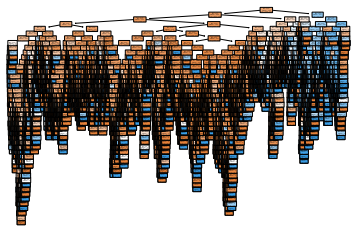

In [7]:
from sklearn import tree
tree.plot_tree(clf, filled=True,rounded=True, feature_names=X.columns)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

BFE

In [12]:
!pip install mlxtend

In [13]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import seaborn as sns
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [14]:
sbs = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=4000),
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=3)
sbs = sbs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   18.5s finished

[2022-03-23 19:11:37] Features: 22/1 -- score: 0.8106666666666668[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   22.3s finished

[2022-03-23 19:12:00] Features: 21/1 -- score: 0.8108749999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    8.7s finished

[2022-03-23 19:12:08] Features: 20/1 -- score: 0.8110833333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [15]:
sbs.k_feature_idx_

(5,)

In [16]:
df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]

In [17]:
df


,feature_idx,avg_score
23,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.810125
22,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...",0.810667
21,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...",0.810875
20,"(0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 1...",0.811083
19,"(0, 1, 2, 3, 4, 5, 9, 10, 11, 12, 13, 14, 15, ...",0.811708
18,"(0, 1, 2, 3, 4, 5, 9, 10, 11, 12, 13, 14, 16, ...",0.812083
17,"(0, 1, 2, 3, 4, 5, 9, 10, 11, 13, 14, 16, 17, ...",0.812167
16,"(0, 1, 2, 3, 4, 5, 9, 10, 11, 13, 14, 16, 17, ...",0.812208
15,"(0, 1, 2, 3, 4, 5, 9, 10, 11, 13, 14, 17, 18, ...",0.812333
14,"(0, 1, 2, 3, 4, 5, 9, 10, 11, 13, 17, 18, 19, 22)",0.812333


In [18]:
sbs.subsets_

{1: {'avg_score': 0.8196666666666667,
  'cv_scores': array([0.823625, 0.819125, 0.81625 ]),
  'feature_idx': (5,),
  'feature_names': ('5',)},
 2: {'avg_score': 0.8122083333333333,
  'cv_scores': array([0.813375, 0.81075 , 0.8125  ]),
  'feature_idx': (0, 5),
  'feature_names': ('0', '5')},
 3: {'avg_score': 0.8131666666666666,
  'cv_scores': array([0.8135  , 0.812375, 0.813625]),
  'feature_idx': (0, 5, 9),
  'feature_names': ('0', '5', '9')},
 4: {'avg_score': 0.8135833333333333,
  'cv_scores': array([0.812875, 0.81275 , 0.815125]),
  'feature_idx': (0, 2, 5, 9),
  'feature_names': ('0', '2', '5', '9')},
 5: {'avg_score': 0.8131666666666666,
  'cv_scores': array([0.81175, 0.81325, 0.8145 ]),
  'feature_idx': (0, 2, 5, 9, 18),
  'feature_names': ('0', '2', '5', '9', '18')},
 6: {'avg_score': 0.8119583333333334,
  'cv_scores': array([0.811375, 0.811125, 0.813375]),
  'feature_idx': (0, 2, 5, 9, 13, 18),
  'feature_names': ('0', '2', '5', '9', '13', '18')},
 7: {'avg_score': 0.812166666

Selected Features ID : (5,)


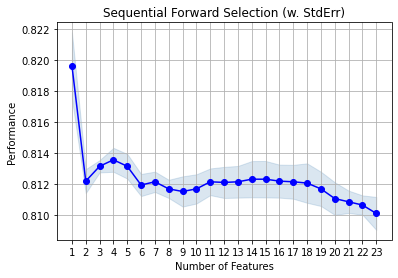

In [19]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
# print("Selected Features :", sbs.k_feature_names_)
print("Selected Features ID :", sbs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [20]:
newdf = pd.DataFrame(X_train)
print(newdf)

             0         1         2         3         4         5         6   \
0     -0.672359  0.808159  0.184306  0.858114 -1.244658  0.014796  0.109694   
1     -1.057768 -1.237381  0.184306  0.858114 -0.811521  0.014796  0.109694   
2      0.098459  0.808159  3.971420 -1.054828  0.921024  0.014796  0.109694   
3     -0.826523 -1.237381 -1.078065  0.858114 -1.136374  0.014796  0.109694   
4     -0.286950  0.808159  0.184306  0.858114 -1.136374  0.014796  0.109694   
...         ...       ...       ...       ...       ...       ...       ...   
23995 -0.903605 -1.237381  0.184306  0.858114 -0.378385  0.014796  0.109694   
23996  0.252623 -1.237381 -1.078065  0.858114  0.163035  1.790286  1.779631   
23997 -0.903605 -1.237381 -1.078065  0.858114 -1.028090 -1.760694 -1.560243   
23998 -0.749441  0.808159  0.184306  0.858114 -1.136374  0.014796  0.109694   
23999 -0.055704  0.808159  0.184306 -1.054828  0.054751 -1.760694 -1.560243   

             7         8         9   ...        13 

In [21]:
selected = list(sbs.k_feature_idx_)

In [22]:
x_bfe = newdf.iloc[:, selected]
print(x_bfe)

              5
0      0.014796
1      0.014796
2      0.014796
3      0.014796
4      0.014796
...         ...
23995  0.014796
23996  1.790286
23997 -1.760694
23998  0.014796
23999 -1.760694

[24000 rows x 1 columns]


In [23]:
bfe_X_train, bfe_X_test, bfe_y_train, bfe_y_test = train_test_split(x_bfe, y_train, test_size = 0.2, random_state = 42)

SVM

In [24]:
from sklearn import svm
from sklearn.svm import SVC

In [25]:
svm = svm.SVC()
svm.fit(bfe_X_train, bfe_y_train)
svm.score(bfe_X_train, bfe_y_train)*100

82.13541666666667

In [26]:
svm_score = svm.score(bfe_X_test, bfe_y_test)*100
print("SVM Accuracy:", svm_score)

SVM Accuracy: 81.29166666666666


KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
classifier = KNeighborsClassifier(n_neighbors = 81)
classifier.fit(bfe_X_train, bfe_y_train)
knn.fit(bfe_X_train, bfe_y_train)

KNeighborsClassifier()

In [28]:
score = knn.score(bfe_X_test, bfe_y_test)
print("KNN Algorithm Score:", score*100)

KNN Algorithm Score: 78.14583333333334


DT

In [29]:
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(bfe_X_train, bfe_y_train)

DecisionTreeClassifier()

In [30]:
j=dclf.score(bfe_X_test, bfe_y_test)
print("Decision Tree Algorithm Score:",j*100)

Decision Tree Algorithm Score: 81.29166666666666


RF

In [31]:
def run_randomForest(bfe_X_train, bfe_y_train,bfe_X_test, bfe_y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state = 42, n_jobs = -1)
    clf.fit(bfe_X_train, bfe_y_train)
    y_pred = clf.predict(bfe_X_test)
    score = accuracy_score(bfe_y_test,y_pred)*100
    print("Random Forest Accuracy:", score)

In [32]:
run_randomForest(bfe_X_train, bfe_y_train,bfe_X_test, bfe_y_test)

Random Forest Accuracy: 81.29166666666666


LR

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(bfe_X_train, bfe_y_train)
lr = model.score(bfe_X_test, bfe_y_test)*100
print("Logistic Regression Accuracy:", lr)

Logistic Regression Accuracy: 81.29166666666666


#Naive Bayes

In [34]:

from sklearn.naive_bayes import BernoulliNB
bng = BernoulliNB()
bng.fit(bfe_X_train, bfe_y_train)
nb_score = bng.score(bfe_X_test, bfe_y_test)*100
print("Naive Bayes Accuracy:", nb_score)

Naive Bayes Accuracy: 77.60416666666666


In [38]:
#Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(bfe_X_train, bfe_y_train)
mlp_score = mlp.score(bfe_X_test, bfe_y_test)*100
print("Multi Layer Perceptron Accuracy:", mlp_score)

Multi Layer Perceptron Accuracy: 81.29166666666666
